<a href="https://colab.research.google.com/github/hetielle/CovidSurvivalPrediction/blob/main/xgbc-rus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

colunas = ['CS_SEXO', 'NU_IDADE_N', 'CS_GESTANT', 'VACINA_COV', 'CLASSI_FIN', 'FATOR_RISC', 'OBESIDADE', 'IMUNODEPRE', 'ASMA', 'PNEUMOPATI', 'SIND_DOWN', 'RENAL', 'PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'HEPATICA', 'OUT_MORBI', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'VOMITO', 'DIARREIA', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', 'EVOLUCAO']

df = pd.read_csv('/content/drive/MyDrive/covid19/dataset.csv', sep=";", usecols=colunas) #usecols: carrega apenas uma lista de coluna

pd.set_option('display.max_columns', None)

sintomas_e_riscos = ['OBESIDADE', 'IMUNODEPRE', 'ASMA', 'PNEUMOPATI', 'SIND_DOWN', 'RENAL', 'PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'HEPATICA', 'OUT_MORBI', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'VOMITO', 'DIARREIA', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']

df[sintomas_e_riscos] = df[sintomas_e_riscos].fillna(2)

df['CS_GESTANT'] = df['CS_GESTANT'].fillna(5)

df['CS_GESTANT'] = df['CS_GESTANT'].map({
    6.0 : 5.0,
    9.0 : 5.0
})

remover_ignorados = sintomas_e_riscos + ['FATOR_RISC', 'VACINA_COV', 'EVOLUCAO']
for n in remover_ignorados:
  df = df[df[n] != 9.0]

df = df.dropna(how='any') #dropar linhas com valores NaN
df = df[df.CLASSI_FIN == 5] #filtrar por passientes com covid-19

df = df[df.EVOLUCAO != 3.0]

convert_bin = remover_ignorados
for n in convert_bin:
  df[n] = df[n].map({
      1.0 : int(1),
      2.0 : int(0)
  })

df = df[['CS_SEXO', 'NU_IDADE_N', 'CS_GESTANT', 'VACINA_COV', 'FATOR_RISC', 'OBESIDADE', 'IMUNODEPRE', 'ASMA', 'PNEUMOPATI', 'SIND_DOWN', 'RENAL', 'PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'HEPATICA', 'OUT_MORBI', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'VOMITO', 'DIARREIA', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', 'EVOLUCAO']] #altera a ordem das colunas e exclui CLASSI_FIN

#df['DT_INTERNA'] = pd.to_datetime(df['DT_INTERNA'], dayfirst=True)
#df['DT_EVOLUCA'] = pd.to_datetime(df['DT_EVOLUCA'], dayfirst=True)

df['CS_SEXO'] = df['CS_SEXO'].map({
    'M' : int(1),
    'F' : int(2)
})
df = df.dropna(how='any')

df.info()
df.shape

display(df)

X = df.drop(columns=['EVOLUCAO'])
y = df['EVOLUCAO']

<ipython-input-2-31c4cb390764>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[n] = df[n].map({
<ipython-input-2-31c4cb390764>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[n] = df[n].map({
<ipython-input-2-31c4cb390764>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399187 entries, 11 to 1733484
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CS_SEXO     399187 non-null  float64
 1   NU_IDADE_N  399187 non-null  int64  
 2   CS_GESTANT  399187 non-null  float64
 3   VACINA_COV  399187 non-null  int64  
 4   FATOR_RISC  399187 non-null  int64  
 5   OBESIDADE   399187 non-null  int64  
 6   IMUNODEPRE  399187 non-null  int64  
 7   ASMA        399187 non-null  int64  
 8   PNEUMOPATI  399187 non-null  int64  
 9   SIND_DOWN   399187 non-null  int64  
 10  RENAL       399187 non-null  int64  
 11  PUERPERA    399187 non-null  int64  
 12  CARDIOPATI  399187 non-null  int64  
 13  HEMATOLOGI  399187 non-null  int64  
 14  HEPATICA    399187 non-null  int64  
 15  OUT_MORBI   399187 non-null  int64  
 16  FEBRE       399187 non-null  int64  
 17  TOSSE       399187 non-null  int64  
 18  GARGANTA    399187 non-null  int64  
 19  

<ipython-input-2-31c4cb390764>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_SEXO'] = df['CS_SEXO'].map({


,CS_SEXO,NU_IDADE_N,CS_GESTANT,VACINA_COV,FATOR_RISC,OBESIDADE,IMUNODEPRE,ASMA,PNEUMOPATI,SIND_DOWN,RENAL,PUERPERA,CARDIOPATI,HEMATOLOGI,HEPATICA,OUT_MORBI,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,DIARREIA,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,EVOLUCAO
11,1.0,29,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1
26,1.0,4,5.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1
32,2.0,77,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0
40,2.0,74,5.0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1
69,1.0,64,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733466,1.0,53,5.0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1
1733469,1.0,34,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0
1733475,2.0,62,5.0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0
1733480,1.0,46,5.0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,1


<Axes: xlabel='EVOLUCAO', ylabel='count'>

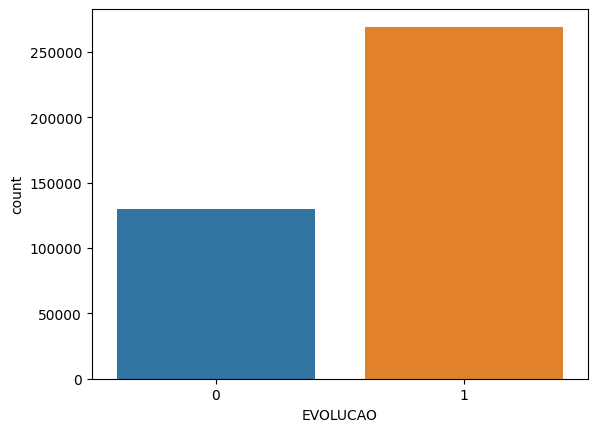

In [ ]:
import seaborn as sns

sns.countplot(x='EVOLUCAO', data=df)

O paciente tem 22.47079908847809 porcento de chance de sobreviver
accuracy: 0.6696493882581641
precision: 0.8216551003656444
recall: 0.6529680365296804
confusion matrix:


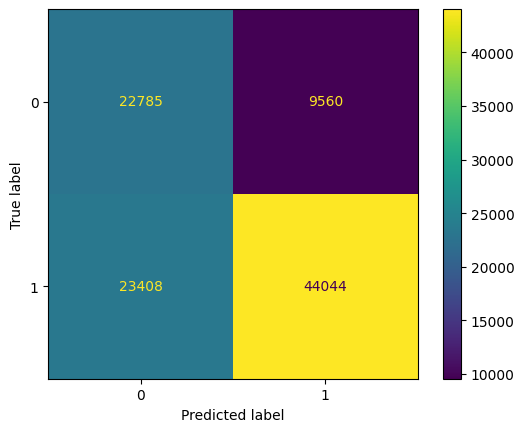

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
#from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score, auc, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC

#rus = RandomUnderSampler()
#X, y = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X.values, y)

ros = RandomUnderSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

#rus = RandomUnderSampler()
#X_train, y_train = rus.fit_resample(X, y)

model = XGBClassifier() #max_depth=6, gamma=0, min_child_weight=10

#parametros = {
    #'max_depth' : [1, 5, 10],
    #'min_child_weight' : [1, 5, 10],
    #'eta' : [0.1, 0.5, 1.0]
    #'n_estimators': [10, 500, 1000, 2000, 3000]
  #'max_features': ['sqrt', 'log2', 2, 5, 8, 13, 21, 34, None]
#}

#grid = GridSearchCV(
#    estimator=model,
#    param_grid=parametros,
#    scoring='accuracy',
#    cv=5
#)

#grid.fit(X_test, y_test)
#print(grid.best_score_)
#print(grid.best_params_)

model.fit(X_train, y_train)
prediction = model.predict_proba([[1, 70, 5, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
#print(prediction)
chance = prediction[0][1] * 100
print("O paciente tem", chance, "porcento de chance de sobreviver")
model.predict([[1, 70, 5, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, prediction))
print("precision:", precision_score(y_test, prediction))
print("recall:", recall_score(y_test, prediction))
cm = confusion_matrix(y_test, prediction, labels=model.classes_)
print("confusion matrix:")
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()